In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, precision_score, recall_score,f1_score,roc_auc_score
import warnings
from sklearn.neural_network import MLPClassifier
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel("court_case.xlsx")

In [3]:
data

,appeal_district,trial_district,offence,sentence,no_complainant,no_male_complainant,no_female_complainant,no_appealant,no_male_appealant,no_female_appealant,no_public_witness,no_eye_witness,no_defense_witness,scn_decision
0,North-West,North-West,Rape_sexual_abuse,Prison_term,1,0,1,1,1,0,4,1,0,Dismissed
1,South-East,South-East,Armed_robbery,Death,1,1,0,1,1,0,2,1,0,Dismissed
2,South-South,South-South,Damage_property,Prison_term_fine,1,1,0,10,10,0,4,0,0,Dismissed
3,South-South,South-South,Murder_manslaughter,Death,2,0,2,1,1,0,2,0,0,Dismissed
4,South-East,Missing,Missing,Payment_damages,1,1,0,2,1,0,-1,0,0,Dismissed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4691,Missing,South-East,Missing,Missing,-1,-1,-1,-1,-1,-1,0,0,0,Dismissed
4692,South-South,South-South,Human_rights_violation,Appeal_granted,-1,-1,-1,-1,-1,-1,0,0,0,Granted
4693,South-South,South-South,Curroption_abuse_office,Payment_damages,-1,-1,-1,1,1,0,0,0,0,Dismissed
4694,South-West,South-West,Dispute,Appeal_granted,-1,-1,-1,-1,-1,-1,0,0,0,Dismissed


In [4]:
mask = (data != -1).all(axis=1)
data= data[mask]

data

,appeal_district,trial_district,offence,sentence,no_complainant,no_male_complainant,no_female_complainant,no_appealant,no_male_appealant,no_female_appealant,no_public_witness,no_eye_witness,no_defense_witness,scn_decision
0,North-West,North-West,Rape_sexual_abuse,Prison_term,1,0,1,1,1,0,4,1,0,Dismissed
1,South-East,South-East,Armed_robbery,Death,1,1,0,1,1,0,2,1,0,Dismissed
2,South-South,South-South,Damage_property,Prison_term_fine,1,1,0,10,10,0,4,0,0,Dismissed
3,South-South,South-South,Murder_manslaughter,Death,2,0,2,1,1,0,2,0,0,Dismissed
5,Missing,Missing,Fraud_impersonation,Payment_damages,1,1,0,2,2,0,0,0,0,Dismissed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4671,Missing,South-West,Claim_for_recovery,Payment_damages,1,1,0,1,1,0,0,0,0,Granted
4684,Missing,Missing,Election_petition,Appeal_granted,1,1,0,1,1,0,0,0,0,Granted
4686,South-South,South-South,Theft,Appeal_granted,2,2,0,1,0,1,0,0,0,Dismissed
4687,Missing,South-South,Missing,Missing,1,0,1,1,0,1,3,0,0,Dismissed


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017 entries, 0 to 4690
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   appeal_district        1017 non-null   object
 1   trial_district         1017 non-null   object
 2   offence                1017 non-null   object
 3   sentence               1017 non-null   object
 4   no_complainant         1017 non-null   int64 
 5   no_male_complainant    1017 non-null   int64 
 6   no_female_complainant  1017 non-null   int64 
 7   no_appealant           1017 non-null   int64 
 8   no_male_appealant      1017 non-null   int64 
 9   no_female_appealant    1017 non-null   int64 
 10  no_public_witness      1017 non-null   int64 
 11  no_eye_witness         1017 non-null   int64 
 12  no_defense_witness     1017 non-null   int64 
 13  scn_decision           1017 non-null   object
dtypes: int64(9), object(5)
memory usage: 119.2+ KB


In [6]:
data.describe()

,no_complainant,no_male_complainant,no_female_complainant,no_appealant,no_male_appealant,no_female_appealant,no_public_witness,no_eye_witness,no_defense_witness
count,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000
mean,0.532940,0.395280,0.075713,1.243854,1.109145,0.066863,0.614553,0.111111,0.111111
std,0.743175,0.618846,0.296253,1.186175,0.998466,0.290013,1.640081,0.600561,0.587304
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,10.000000,5.000000,3.000000,23.000000,10.000000,3.000000,12.000000,8.000000,10.000000


In [7]:
data.duplicated().sum()

158

In [8]:
data.isnull().sum()

appeal_district          0
trial_district           0
offence                  0
sentence                 0
no_complainant           0
no_male_complainant      0
no_female_complainant    0
no_appealant             0
no_male_appealant        0
no_female_appealant      0
no_public_witness        0
no_eye_witness           0
no_defense_witness       0
scn_decision             0
dtype: int64

In [9]:
data = data.drop(["appeal_district",'trial_district'], axis = 1)

In [10]:
data.head()

,offence,sentence,no_complainant,no_male_complainant,no_female_complainant,no_appealant,no_male_appealant,no_female_appealant,no_public_witness,no_eye_witness,no_defense_witness,scn_decision
0,Rape_sexual_abuse,Prison_term,1,0,1,1,1,0,4,1,0,Dismissed
1,Armed_robbery,Death,1,1,0,1,1,0,2,1,0,Dismissed
2,Damage_property,Prison_term_fine,1,1,0,10,10,0,4,0,0,Dismissed
3,Murder_manslaughter,Death,2,0,2,1,1,0,2,0,0,Dismissed
5,Fraud_impersonation,Payment_damages,1,1,0,2,2,0,0,0,0,Dismissed


In [11]:
# data=data.drop_duplicates()
df=data

In [12]:
data

,offence,sentence,no_complainant,no_male_complainant,no_female_complainant,no_appealant,no_male_appealant,no_female_appealant,no_public_witness,no_eye_witness,no_defense_witness,scn_decision
0,Rape_sexual_abuse,Prison_term,1,0,1,1,1,0,4,1,0,Dismissed
1,Armed_robbery,Death,1,1,0,1,1,0,2,1,0,Dismissed
2,Damage_property,Prison_term_fine,1,1,0,10,10,0,4,0,0,Dismissed
3,Murder_manslaughter,Death,2,0,2,1,1,0,2,0,0,Dismissed
5,Fraud_impersonation,Payment_damages,1,1,0,2,2,0,0,0,0,Dismissed
...,...,...,...,...,...,...,...,...,...,...,...,...
4671,Claim_for_recovery,Payment_damages,1,1,0,1,1,0,0,0,0,Granted
4684,Election_petition,Appeal_granted,1,1,0,1,1,0,0,0,0,Granted
4686,Theft,Appeal_granted,2,2,0,1,0,1,0,0,0,Dismissed
4687,Missing,Missing,1,0,1,1,0,1,3,0,0,Dismissed


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Prison_term'),
  Text(1, 0, 'Death'),
  Text(2, 0, 'Prison_term_fine'),
  Text(3, 0, 'Payment_damages'),
  Text(4, 0, 'Missing'),
  Text(5, 0, 'Fine'),
  Text(6, 0, 'Appeal_granted'),
  Text(7, 0, 'Appeal_dismissed'),
  Text(8, 0, 'Death_x000D_'),
  Text(9, 0, 'Prison_term_hard_labour'),
  Text(10, 0, 'Others')])

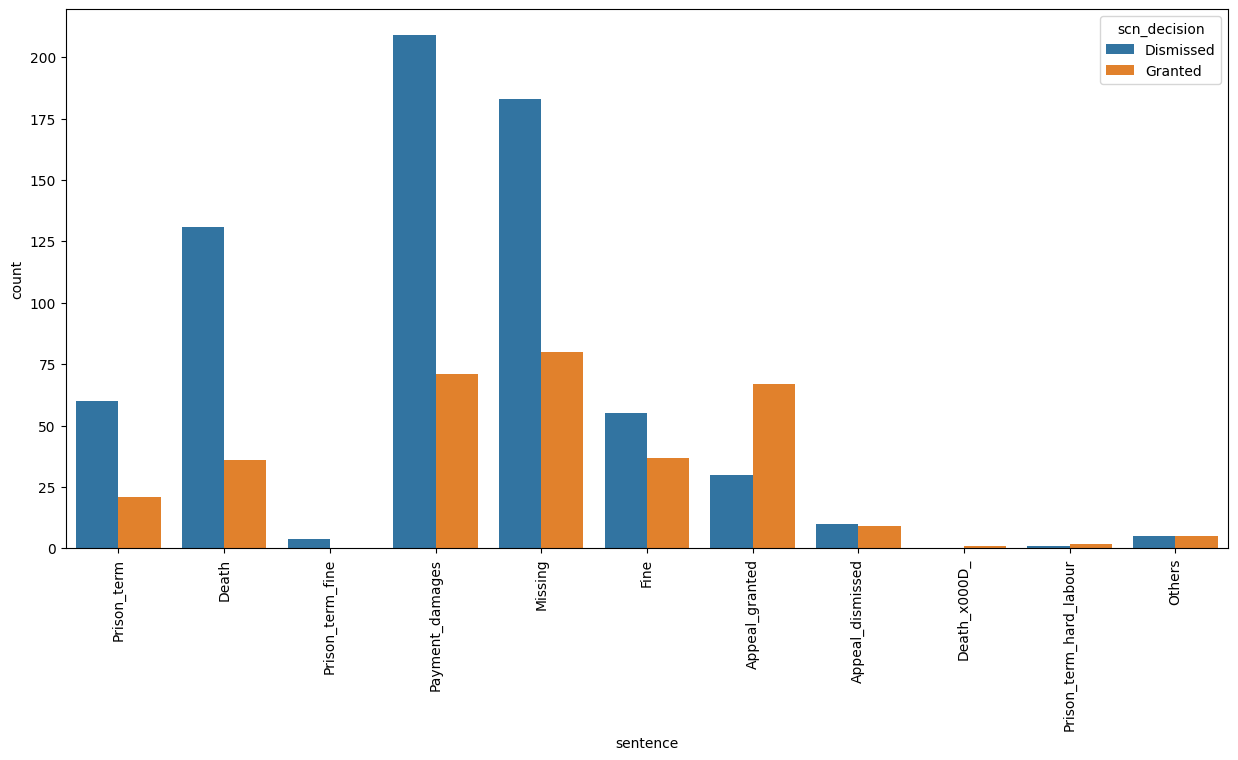

In [13]:
plt.figure(figsize=(15,7))
sns.countplot(x='sentence',data=data,hue='scn_decision')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'Rape_sexual_abuse'),
  Text(1, 0, 'Armed_robbery'),
  Text(2, 0, 'Damage_property'),
  Text(3, 0, 'Murder_manslaughter'),
  Text(4, 0, 'Fraud_impersonation'),
  Text(5, 0, 'Unlawful_possession'),
  Text(6, 0, 'Missing'),
  Text(7, 0, 'Human_rights_violation'),
  Text(8, 0, 'Trespassing'),
  Text(9, 0, 'Others'),
  Text(10, 0, 'Law_of_tort'),
  Text(11, 0, 'Libel'),
  Text(12, 0, 'Court_order_violation'),
  Text(13, 0, 'Dispute'),
  Text(14, 0, 'Unlawful_termination_appointment'),
  Text(15, 0, 'Conspiracy'),
  Text(16, 0, 'Election_petition'),
  Text(17, 0, 'Theft'),
  Text(18, 0, 'Civil_petition'),
  Text(19, 0, 'Claim_for_recovery'),
  Text(20, 0, 'Curroption_abuse_office'),
  Text(21, 0, 'Wrongful_accusations')])

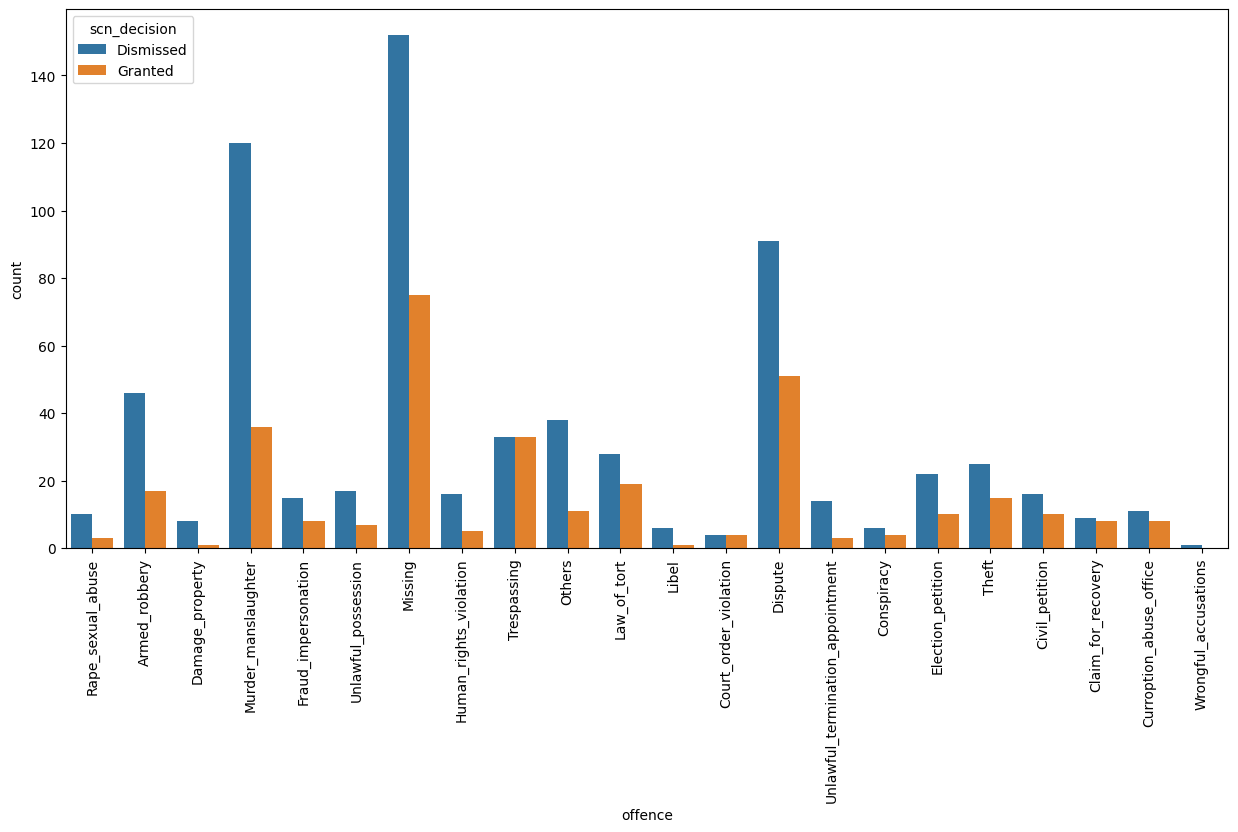

In [14]:
plt.figure(figsize=(15,7))
sns.countplot(x='offence',data=data,hue='scn_decision')
plt.xticks(rotation=90)

<AxesSubplot:xlabel='scn_decision', ylabel='count'>

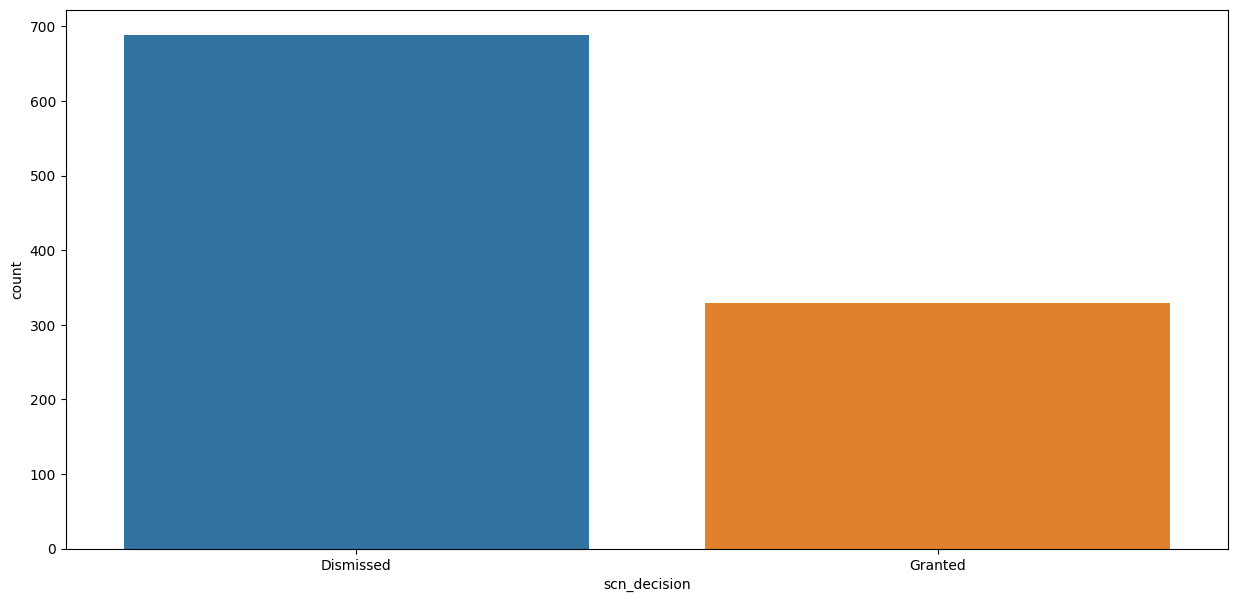

In [15]:
plt.figure(figsize=(15,7))
sns.countplot(x='scn_decision',data=df)

In [16]:
lb = LabelEncoder()
ls=["offence","sentence","scn_decision"]
for x in ls:
    df[x] = lb.fit_transform(df[x])
df

,offence,sentence,no_complainant,no_male_complainant,no_female_complainant,no_appealant,no_male_appealant,no_female_appealant,no_public_witness,no_eye_witness,no_defense_witness,scn_decision
0,16,8,1,0,1,1,1,0,4,1,0,0
1,0,2,1,1,0,1,1,0,2,1,0,0
2,6,9,1,1,0,10,10,0,4,0,0,0
3,14,2,2,0,2,1,1,0,2,0,0,0
5,9,7,1,1,0,2,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4671,2,7,1,1,0,1,1,0,0,0,0,1
4684,8,1,1,1,0,1,1,0,0,0,0,1
4686,17,1,2,2,0,1,0,1,0,0,0,0
4687,13,5,1,0,1,1,0,1,3,0,0,0


In [17]:
df

,offence,sentence,no_complainant,no_male_complainant,no_female_complainant,no_appealant,no_male_appealant,no_female_appealant,no_public_witness,no_eye_witness,no_defense_witness,scn_decision
0,16,8,1,0,1,1,1,0,4,1,0,0
1,0,2,1,1,0,1,1,0,2,1,0,0
2,6,9,1,1,0,10,10,0,4,0,0,0
3,14,2,2,0,2,1,1,0,2,0,0,0
5,9,7,1,1,0,2,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4671,2,7,1,1,0,1,1,0,0,0,0,1
4684,8,1,1,1,0,1,1,0,0,0,0,1
4686,17,1,2,2,0,1,0,1,0,0,0,0
4687,13,5,1,0,1,1,0,1,3,0,0,0


<AxesSubplot:>

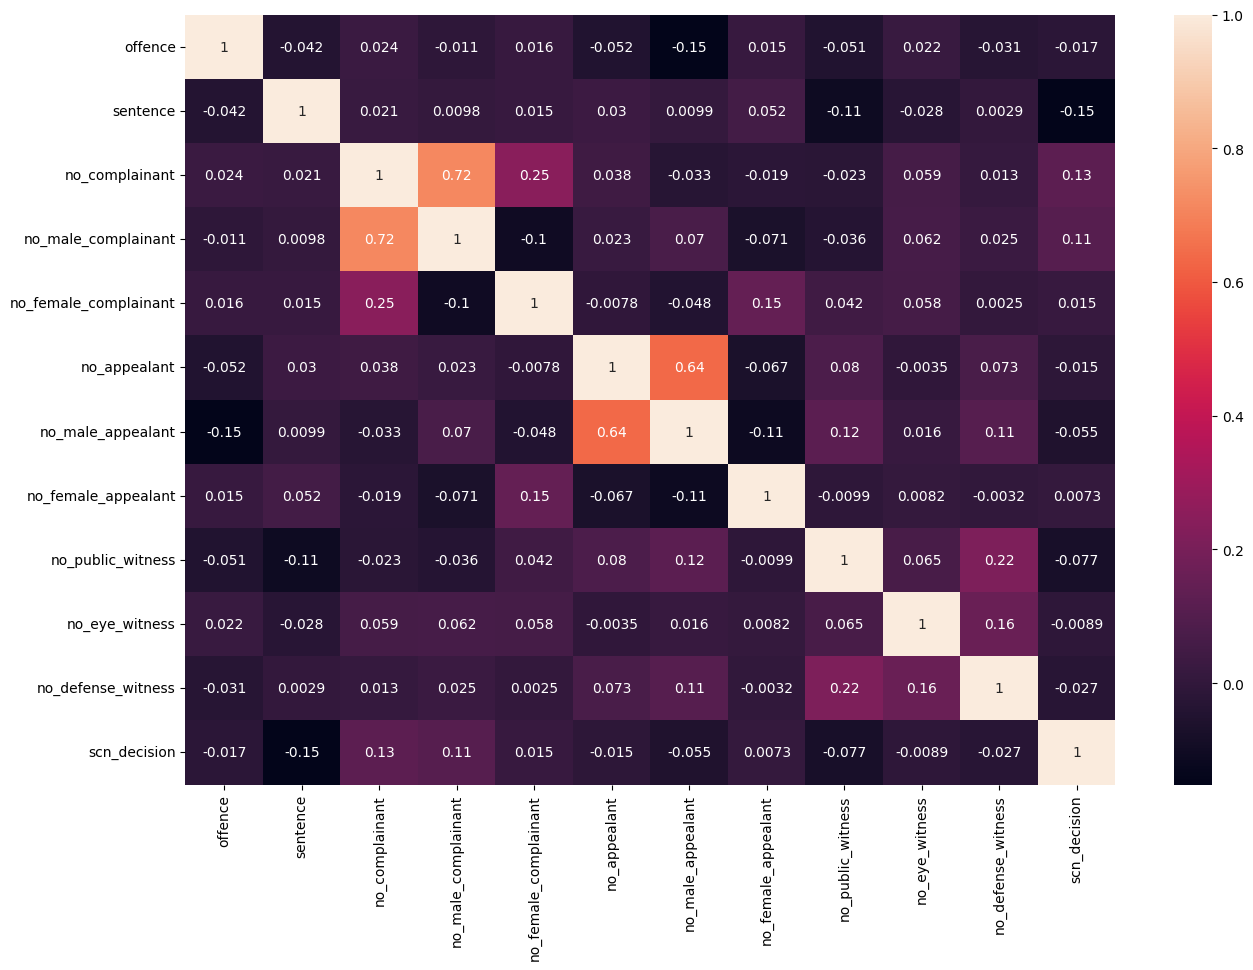

In [18]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), annot = True)

## Data Splitting 1

In [19]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [20]:
x.shape

(1017, 11)

## Feature Selection

['offence', 'sentence', 'no_public_witness', 'no_complainant', 'no_male_appealant', 'no_appealant', 'no_male_complainant']


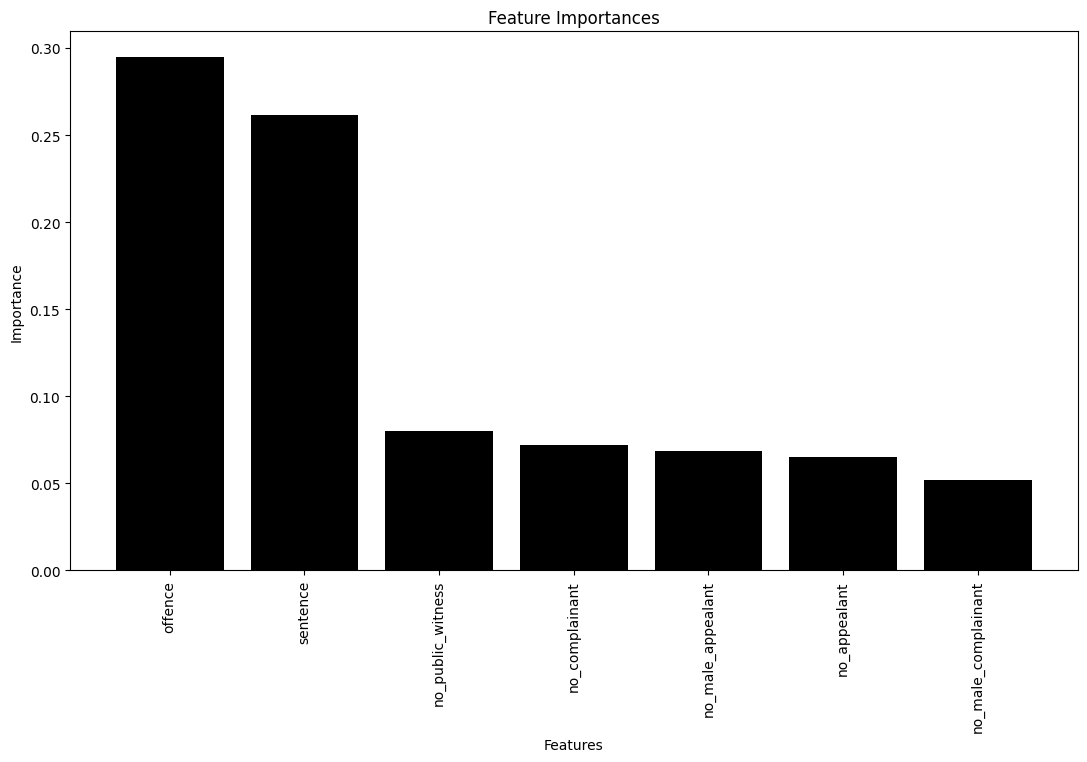

In [21]:

rf = RandomForestClassifier()
rf.fit(x,y)
feature_importances = rf.feature_importances_
importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
ifs=importance_df['Feature'][:7]
selected_columns = list(ifs)
print(selected_columns)

plt.figure(figsize=(13,7))
plt.bar(ifs, importance_df['Importance'][:7], color='black')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.show()

In [22]:
x=df[['offence', 'sentence', 'no_complainant', 'no_public_witness', 'no_male_appealant', 'no_appealant', 'no_male_complainant']]

In [23]:
x

,offence,sentence,no_complainant,no_public_witness,no_male_appealant,no_appealant,no_male_complainant
0,16,8,1,4,1,1,0
1,0,2,1,2,1,1,1
2,6,9,1,4,10,10,1
3,14,2,2,2,1,1,0
5,9,7,1,0,2,2,1
...,...,...,...,...,...,...,...
4671,2,7,1,0,1,1,1
4684,8,1,1,0,1,1,1
4686,17,1,2,0,0,1,2
4687,13,5,1,3,0,1,0


In [24]:
import imblearn

In [25]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x, y = smote.fit_resample(x, y)

In [26]:
from sklearn.preprocessing import MinMaxScaler
sc=StandardScaler()
x = sc.fit_transform(x)

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()
rf_model.fit(x_train, y_train)
rf_pred= rf_model.predict(x_test)
print(classification_report(rf_pred, y_test))
print('precision score:',precision_score(y_test,rf_pred))
print('Recall score:',recall_score(y_test,rf_pred))
print('F1 score:',f1_score(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.72      0.80      0.76        71
           1       0.76      0.67      0.71        67

    accuracy                           0.74       138
   macro avg       0.74      0.74      0.74       138
weighted avg       0.74      0.74      0.74       138

precision score: 0.6716417910447762
Recall score: 0.7627118644067796
F1 score: 0.7142857142857143


In [29]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bg_model=BaggingClassifier(estimator=DecisionTreeClassifier())
bg_model.fit(x_train, y_train)
bg_pred= bg_model.predict(x_test)
print(classification_report(bg_pred, y_test))
print('precision score:',precision_score(y_test,bg_pred))
print('Recall score:',recall_score(y_test,bg_pred))
print('F1 score:',f1_score(y_test,bg_pred))

              precision    recall  f1-score   support

           0       0.67      0.78      0.72        68
           1       0.75      0.63      0.68        70

    accuracy                           0.70       138
   macro avg       0.71      0.70      0.70       138
weighted avg       0.71      0.70      0.70       138

precision score: 0.6285714285714286
Recall score: 0.7457627118644068
F1 score: 0.6821705426356589


In [30]:
import xgboost

In [31]:
import xgboost as xg
xg_model=xg.XGBClassifier()
xg_model.fit(x_train, y_train)
xg_pred= xg_model.predict(x_test)
print(classification_report(xg_pred, y_test))
print('precision score:',precision_score(y_test,xg_pred))
print('Recall score:',recall_score(y_test,xg_pred))
print('F1 score:',f1_score(y_test,xg_pred))

              precision    recall  f1-score   support

           0       0.73      0.85      0.79        68
           1       0.83      0.70      0.76        70

    accuracy                           0.78       138
   macro avg       0.78      0.78      0.77       138
weighted avg       0.78      0.78      0.77       138

precision score: 0.7
Recall score: 0.8305084745762712
F1 score: 0.7596899224806201


In [33]:
# import pickle
# with open('model.pkl', 'wb') as f:
#     pickle.dump(xg_model,f)


In [34]:
# xg_pred

array([1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0])

In [46]:
# test1=xg_model.predict([[16,8,1,4,1,1,0]])
# test2=xg_model.predict([[14,2,2,2,1,1,0]])

# if test1[0]==0:
#     print('Dismissed')
# else:
#     print('Granted')


In [47]:
# if test2[0]==0:
#     print('Dismissed')
# else:
#     print('Granted')